<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.6'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n20.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.348495,31.894592,21.632837,63.286791,0.055902,163.218617,163.206813,0.011804
1,0.0,1.0,57.161678,33.434127,42.578469,71.261520,0.133350,214.569144,214.484890,0.084254
2,0.0,2.0,55.723606,22.774772,95.862230,33.269273,-0.121681,217.508199,217.633532,-0.125333
3,0.0,3.0,85.985734,98.709875,31.742324,36.960861,0.000650,263.399444,263.392802,0.006642
4,0.0,4.0,68.253511,29.766497,35.850035,29.846437,0.098200,173.814681,173.741484,0.073196
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.814265,74.035957,43.105124,39.589561,-0.066489,218.478417,218.550579,-0.072162
19996,999.0,16.0,68.050332,24.304751,30.406790,90.205799,-0.094047,222.873626,222.934804,-0.061178
19997,999.0,17.0,38.438888,59.740294,22.800840,78.804927,0.049959,209.834908,209.751856,0.083053
19998,999.0,18.0,45.529815,52.929794,58.682043,78.650432,-0.060831,245.731253,245.770664,-0.039410


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.348495  31.894592  21.632837  63.286791  0.055902  163.218617   
      1.0    57.161678  33.434127  42.578469  71.261520  0.133350  214.569144   
      2.0    55.723606  22.774772  95.862230  33.269273 -0.121681  217.508199   
      3.0    85.985734  98.709875  31.742324  36.960861  0.000650  263.399444   
      4.0    68.253511  29.766497  35.850035  29.846437  0.098200  173.814681   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   51.814265  74.035957  43.105124  39.589561 -0.066489  218.478417   
      16.0   68.050332  24.304751  30.406790  90.205799 -0.094047  222.873626   
      17.0   38.438888  59.740294  22.800840  78.804927  0.049959  209.834908   
      18.0   45.529815  52.929794  58.682043  78.650432 -0.060831  245.731253   
      19.0   23.916333  77.244241  77.507430  62.985704 -0.024347  251.629362   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    163.206813  0.011804  
      1.0    214.484890  0.084254  
      2.0    217.633532 -0.125333  
      3.0    263.392802  0.006642  
      4.0    173.741484  0.073196  
...                 ...       ...  
999.0 15.0   218.550579 -0.072162  
      16.0   222.934804 -0.061178  
      17.0   209.751856  0.083053  
      18.0   245.770664 -0.039410  
      19.0   251.643882 -0.014520  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.348495  31.894592  21.632837  63.286791  0.055902  163.218617   
      1.0    57.161678  33.434127  42.578469  71.261520  0.133350  214.569144   
      2.0    55.723606  22.774772  95.862230  33.269273 -0.121681  217.508199   
      3.0    85.985734  98.709875  31.742324  36.960861  0.000650  263.399444   
      4.0    68.253511  29.766497  35.850035  29.846437  0.098200  173.814681   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   51.814265  74.035957  43.105124  39.589561 -0.066489  218.478417   
      16.0   68.050332  24.304751  30.406790  90.205799 -0.094047  222.873626   
      17.0   38.438888  59.740294  22.800840  78.804927  0.049959  209.834908   
      18.0   45.529815  52.929794  58.682043  78.650432 -0.060831  245.731253   
      19.0   23.916333  77.244241  77.507430  62.985704 -0.024347  251.629362   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    163.206813  0.011804  
      1.0    214.484890  0.084254  
      2.0    217.633532 -0.125333  
      3.0    263.392802  0.006642  
      4.0    173.741484  0.073196  
...                 ...       ...  
999.0 15.0   218.550579 -0.072162  
      16.0   222.934804 -0.061178  
      17.0   209.751856  0.083053  
      18.0   245.770664 -0.039410  
      19.0   251.643882 -0.014520  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.348495,31.894592,21.632837,63.286791,0.055902,163.218617,163.206813,0.011804
1,0.0,1.0,57.161678,33.434127,42.578469,71.261520,0.133350,214.569144,214.484890,0.084254
2,0.0,2.0,55.723606,22.774772,95.862230,33.269273,-0.121681,217.508199,217.633532,-0.125333
3,0.0,3.0,85.985734,98.709875,31.742324,36.960861,0.000650,263.399444,263.392802,0.006642
4,0.0,4.0,68.253511,29.766497,35.850035,29.846437,0.098200,173.814681,173.741484,0.073196
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.814265,74.035957,43.105124,39.589561,-0.066489,218.478417,218.550579,-0.072162
19996,999.0,16.0,68.050332,24.304751,30.406790,90.205799,-0.094047,222.873626,222.934804,-0.061178
19997,999.0,17.0,38.438888,59.740294,22.800840,78.804927,0.049959,209.834908,209.751856,0.083053
19998,999.0,18.0,45.529815,52.929794,58.682043,78.650432,-0.060831,245.731253,245.770664,-0.039410


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.348495  31.894592  21.632837  63.286791  0.055902  163.218617   
      1.0    57.161678  33.434127  42.578469  71.261520  0.133350  214.569144   
      2.0    55.723606  22.774772  95.862230  33.269273 -0.121681  217.508199   
      3.0    85.985734  98.709875  31.742324  36.960861  0.000650  263.399444   
      4.0    68.253511  29.766497  35.850035  29.846437  0.098200  173.814681   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   51.814265  74.035957  43.105124  39.589561 -0.066489  218.478417   
      16.0   68.050332  24.304751  30.406790  90.205799 -0.094047  222.873626   
      17.0   38.438888  59.740294  22.800840  78.804927  0.049959  209.834908   
      18.0   45.529815  52.929794  58.682043  78.650432 -0.060831  245.731253   
      19.0   23.916333  77.244241  77.507430  62.985704 -0.024347  251.629362   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    163.206813  0.011804  
      1.0    214.484890  0.084254  
      2.0    217.633532 -0.125333  
      3.0    263.392802  0.006642  
      4.0    173.741484  0.073196  
...                 ...       ...  
999.0 15.0   218.550579 -0.072162  
      16.0   222.934804 -0.061178  
      17.0   209.751856  0.083053  
      18.0   245.770664 -0.039410  
      19.0   251.643882 -0.014520  

[20000 rows x 8 columns]

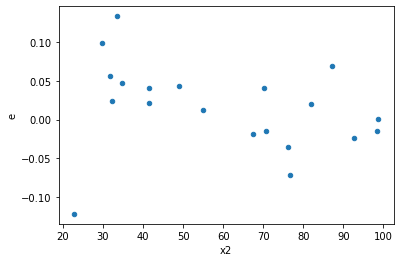

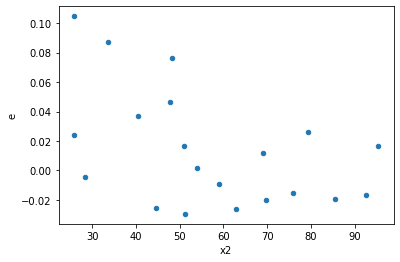

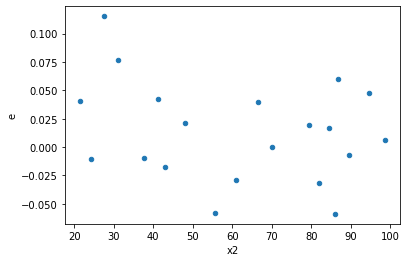

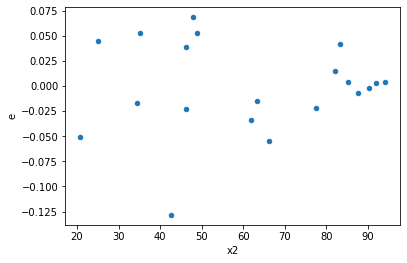

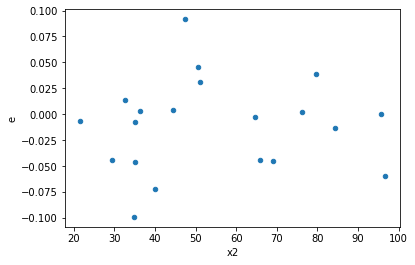

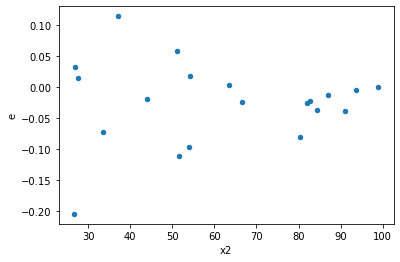

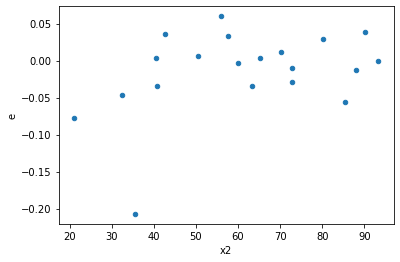

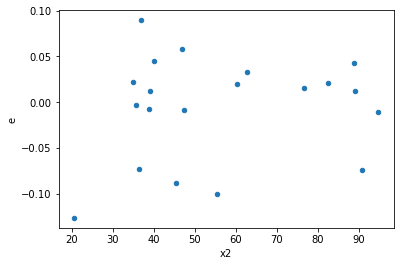

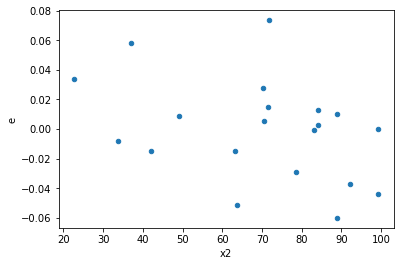

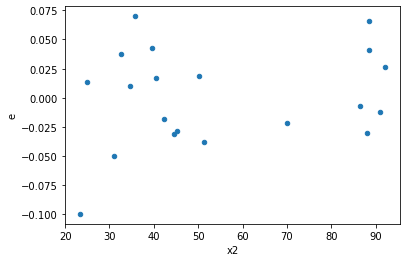

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,6.0,0.005676625854163696,0.00774877718179194,0.0009461043090272826,0.00129146286363199,1.3650322182337173,0.715165361868991,0.6424173190655045,0.3575826809344955,Reject001=1 : Homoscedasticity
2.0,5.0,7.0,0.0013533298957457602,0.016546458893711518,0.00027066597914915207,0.002363779841958788,8.7331989391109,0.012833092500645682,0.9935834537496772,0.006416546250322841,Reject001=1 : Homoscedasticity
3.0,1.0,11.0,8.30411786820813e-25,0.032189635572080974,8.30411786820813e-25,0.0029263305065528157,3.523951072221789e+21,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
5.0,8.0,4.0,0.009937101804424161,0.03397764114321223,0.0012421377255530202,0.008494410285803057,6.838541420212647,0.08082656785801978,0.9595867160709901,0.04041328392900989,Reject001=1 : Homoscedasticity
7.0,7.0,5.0,0.020998772238977514,0.02078698479477893,0.002999824605568216,0.004157396958955786,1.3858800115309764,0.7437198714572242,0.6281400642713879,0.3718599357286121,Reject001=1 : Homoscedasticity
9.0,6.0,6.0,0.008313093237858038,0.01115465831358678,0.0013855155396430062,0.00185910971893113,1.341818020612133,0.7301823280515705,0.6349088359742148,0.36509116402578523,Reject001=1 : Homoscedasticity
10.0,5.0,7.0,0.004676928511535602,0.026456134566953064,0.0009353857023071205,0.003779447795279009,4.040523375498508,0.09609018294349125,0.9519549085282544,0.04804509147174563,Reject001=1 : Homoscedasticity
11.0,6.0,6.0,0.007798825970974232,0.009448386760568429,0.0012998043284957054,0.0015747311267614048,1.2115139888662156,0.8217615362686956,0.5891192318656522,0.4108807681343478,Reject001=1 : Homoscedasticity
12.0,7.0,5.0,0.004756888943251717,0.0050508611167785315,0.0006795555633216739,0.0010101722233557063,1.4865189513245614,0.6847703434032102,0.6576148282983949,0.3423851717016051,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,5.0,0.015222706377203563,0.004554487914406433,0.002174672339600509,0.0009108975828812866,0.4188665879884323,0.28755328754665427,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,0.005676625854163696,0.00774877718179194,0.0009461043090272826,0.00129146286363199,1.3650322182337173,0.715165361868991,Reject001=1 : Homoscedasticity
2.0,5.0,7.0,0.0013533298957457602,0.016546458893711518,0.00027066597914915207,0.002363779841958788,8.7331989391109,0.012833092500645682,Reject001=1 : Homoscedasticity
3.0,1.0,11.0,8.30411786820813e-25,0.032189635572080974,8.30411786820813e-25,0.0029263305065528157,3.523951072221789e+21,0.0,Reject001=0 : Heteroscedasticity
4.0,7.0,5.0,0.008448459979105103,0.001298114330204069,0.0012069228541578718,0.00025962286604081376,0.21511140098673923,0.0688111144736492,Reject001=1 : Homoscedasticity
5.0,8.0,4.0,0.009937101804424161,0.03397764114321223,0.0012421377255530202,0.008494410285803057,6.838541420212647,0.08082656785801978,Reject001=1 : Homoscedasticity
6.0,8.0,4.0,0.009328707024439565,0.0031806501980933127,0.0011660883780549457,0.0007951625495233282,0.6819059039501553,0.5966238634782849,Reject001=1 : Homoscedasticity
7.0,7.0,5.0,0.020998772238977514,0.02078698479477893,0.002999824605568216,0.004157396958955786,1.3858800115309764,0.7437198714572242,Reject001=1 : Homoscedasticity
8.0,10.0,2.0,0.007248567406732281,0.00010146329707940567,0.0007248567406732281,5.0731648539702836e-05,0.06998851730699862,0.002341194483462046,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      843
Reject001=0 : Heteroscedasticity    157
Name: Result_test, dtype: int64